In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 25
plt.rcParams['figure.figsize'] = [50, 10] # 전역으로 차트의 크기 설정

# 한글 폰트 설정
plt.rc('font', family="Malgun Gothic")

# 폰트가 선명하게 보이도록 retina설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

marathonDf = pd.read_csv('./marathon/marathon_merge[2015~2017].csv')
# marathonDf.head()

In [3]:
# plt.figure(figsize=(7, 7)) # 차트의 크기설정

In [4]:
# 남녀 참가자의 비율
m = marathonDf['M/F'].value_counts()
m

M    43482
F    36156
Name: M/F, dtype: int64

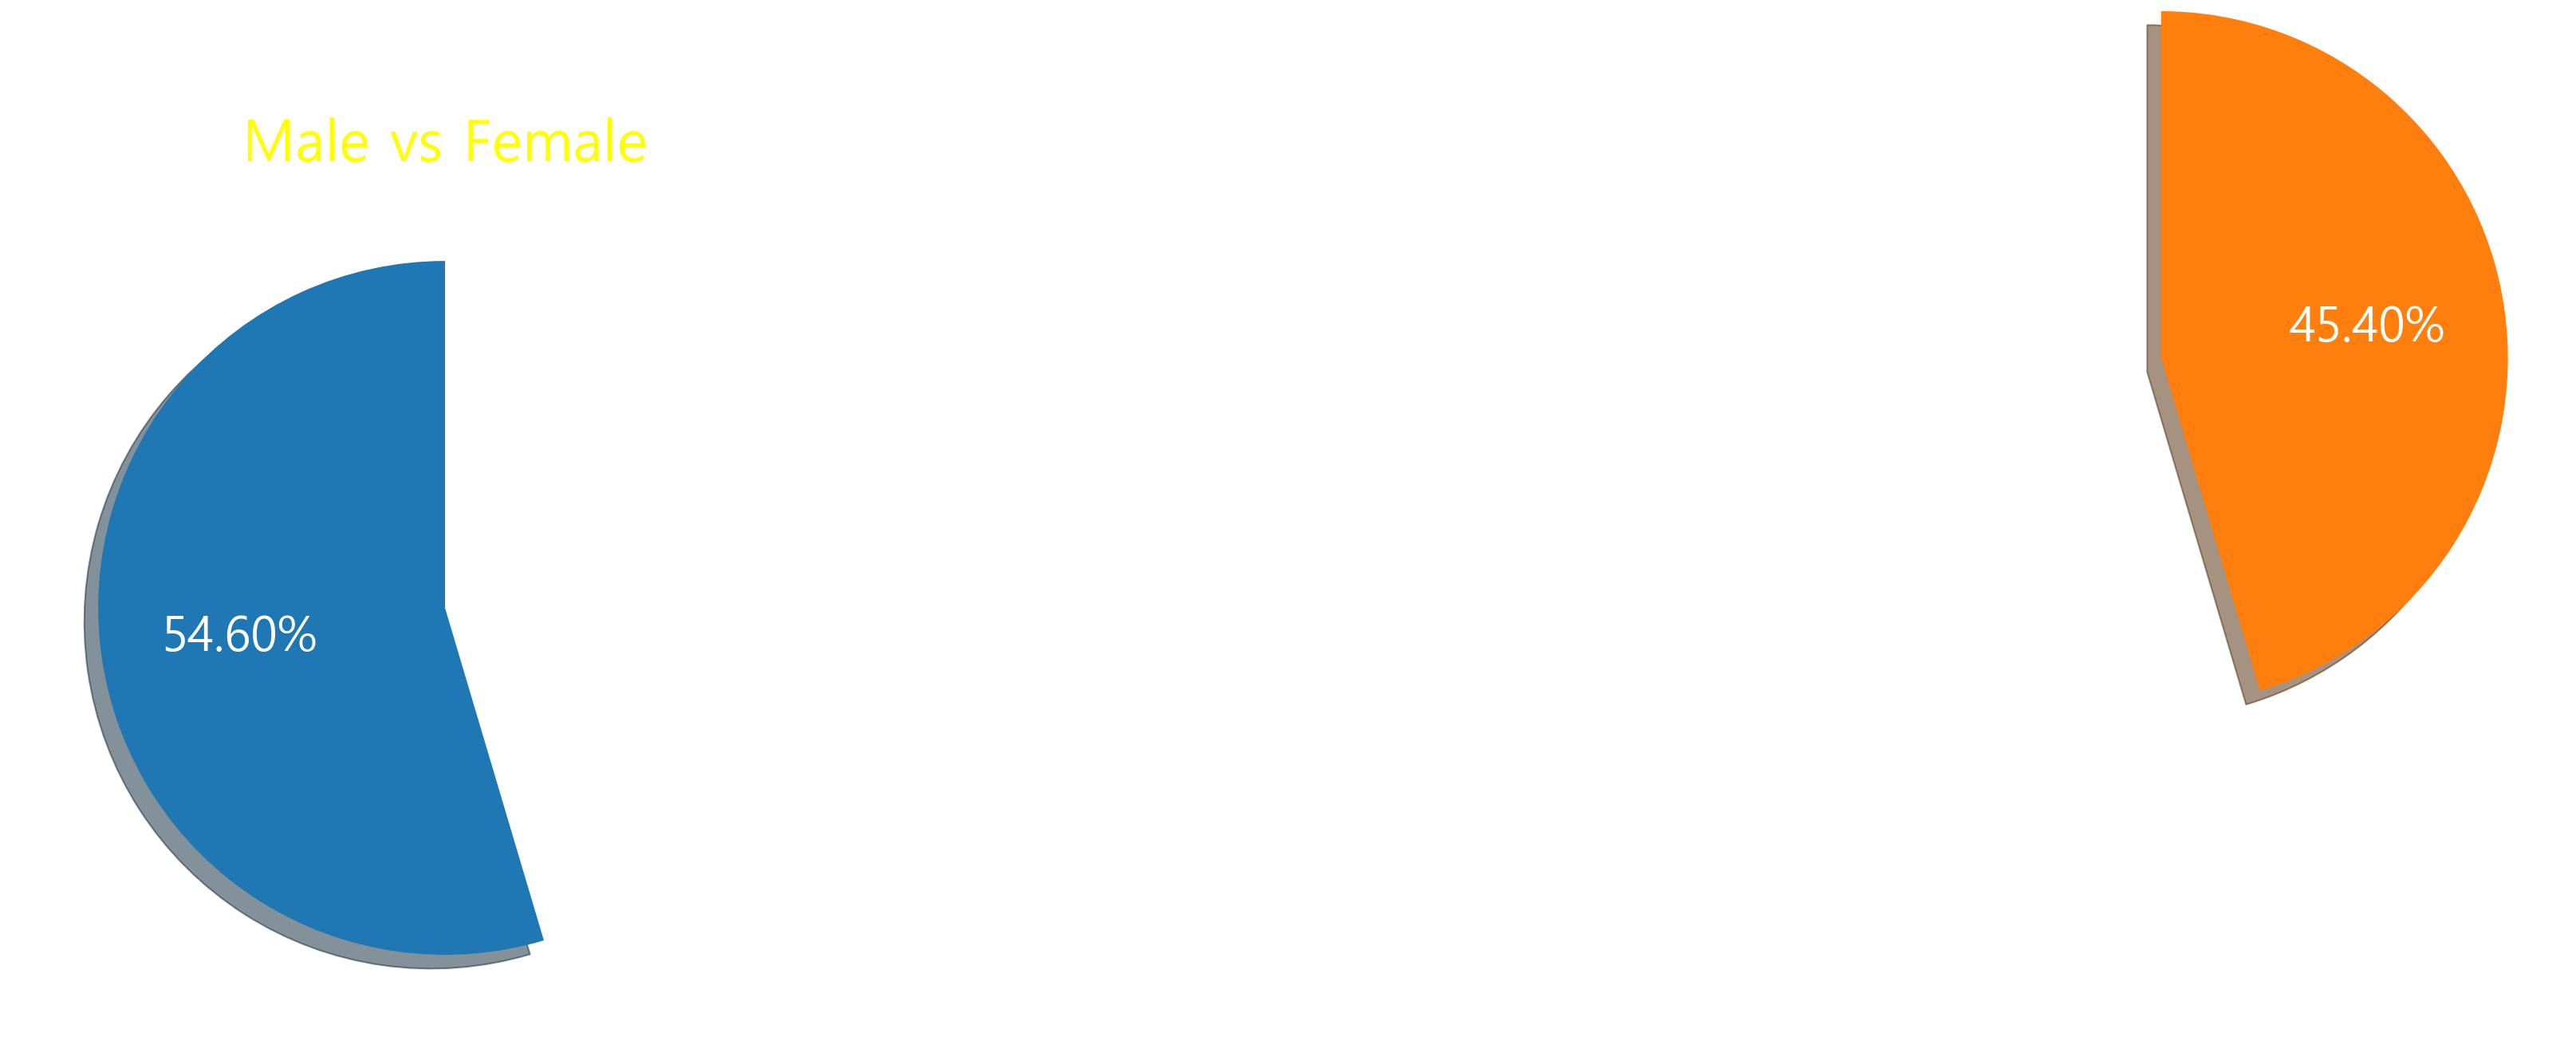

In [27]:
plt.title('Male vs Female', fontdict={'fontsize': 36, 'color': 'yellow'})
plt.pie(
    m
    , labels=('1', '2')
    , startangle=90 # startangle : 화면에 표시되기전 회전각도
    , autopct='%.2f%%' # autopct : 자동 비율전환 & 출력 양식 설정
    , explode=(0, 5) # explode : 각 구성요소중 강조하고자 하는 조각을 얼만큼 빼내어서 표시할지에 대한 설정(데이터 개수만큼 설정)
    , shadow=True # shadow : 그림자 설정
    , textprops={'fontsize': 30, 'color':'white'}
)
plt.show()

### 연습문제
- Age컬럼을 기준으로 Lev4 컬럼(연령대)를 새로 생성하고, 이 값을 바탕으로 Pie 차트를 생성하세요

* 작성조건
1. 각 연령대는 20대이하, 30대, 40대, 50이상 이렇게 네개 값으로 구성
1. Lev4 컬럼을 생성할 때는 apply lambda 또는 연산 등을 사용하세요
1. 회전은 90도, 출력형식은 소수점 2자리까지, 가장 인원이 많은 조각만 0.1 만큼 떼어내어 표현
1. 그림자 효과 True
1. 차트제목은 "연령대별 참가자"
1. 각 조각에 라벨을 넣어주세요

40대       25003
50대 이상    22298
30대       19796
20대 이하    12541
Name: Age, dtype: int64


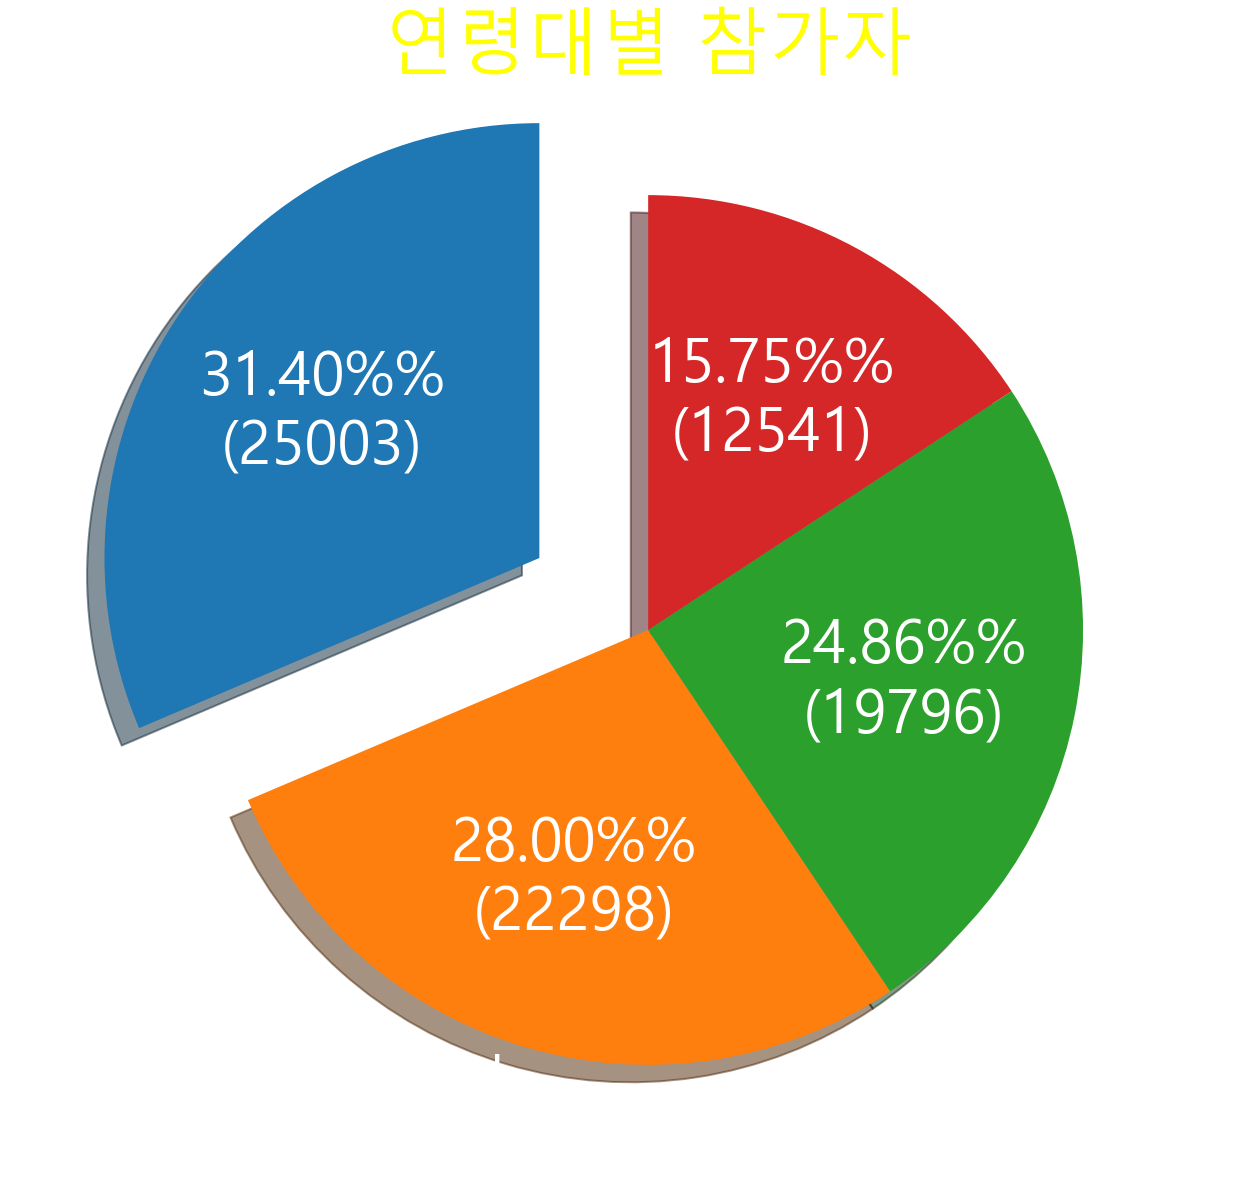

In [30]:
def my_fmt(x):
    # len(marathonDf) : 데이터프레임의 데이터 건수
    # x / 100 : 백분율값을 100으로 나눈 비율을 건수에 곱하여 실제 값을 얻습니다.
    return '{:.2f}%%\n({:.0f})'.format(x, len(marathonDf)*x/100)

data = marathonDf.Age.apply(lambda x:
    '20대 이하' if x < 30 else (
    '30대' if x < 40 else (
    '40대' if x < 50 else 
    '50대 이상'))).value_counts()

print(data)

plt.title('연령대별 참가자', fontdict={'fontsize': 36, 'color': 'yellow'})
plt.pie(
    data
    , labels=('40대', '50대 이상', '30대', '20대 이하',)
    , explode=(0.3, 0, 0, 0,)
    , startangle=90
    , autopct=my_fmt
    , shadow=True
    , textprops={'fontsize': 30, 'color':'white'}
)
plt.show()